##### 워드임베딩 - 단어를 벡터로 표현하는 방법, 단어를 밀집 표현으로 변환

##### 워드투벡터 - 단어 간 유사성을 고려하기 위해 단어의 의미를 벡터화 
##### 주변 단어를 통해 중심 단어를 예측하는 방법
##### 중심 단어를 통해 주변 단어를 예측하는 방법 

In [13]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/ALL_DATA_1.csv",encoding='cp949')
# 중복행 제거
df = df.drop_duplicates(['리뷰'], keep='first')
df.head()

,닉네임,제품명,가격,평점,리뷰,url
0,nbnb****,말하는 따라쟁이 앵무새 인형 말따라하는 장난감,"6,500",4,가성비대비 짱이네요\n아이들이 정말 좋아해요\n저는 영어수업때 교구로 쓸려고 샀는...,https://smartstore.naver.com/soppingacademicth...
1,ojh2****,말하는 따라쟁이 앵무새 인형 말따라하는 장난감,"6,500",5,돌아기가 무지 좋아해요^^ 실실 웃으면서 쓰담쓰담 뽀뽀도 해주더라구요! 근데 솜이 ...,https://smartstore.naver.com/soppingacademicth...
2,yons****,말하는 따라쟁이 앵무새 인형 말따라하는 장난감,"6,500",3,어제는 말하고나서 3초이상 쉬었다가 말을 해야지만. 따라했습니다. 오늘은 좀 더 말...,https://smartstore.naver.com/soppingacademicth...
3,ohmy****,말하는 따라쟁이 앵무새 인형 말따라하는 장난감,"6,500",4,귀엽네요. 아기가 어려서 아주 조금 무서워하지만 관심은 계속 보이고 있어요.\n지금...,https://smartstore.naver.com/soppingacademicth...
4,ehsd****,말하는 따라쟁이 앵무새 인형 말따라하는 장난감,"6,500",5,재밋어요~\n좀 소리가.큰데 스피커를 좀 작게 하는방법은 없을까요?\n아들이재밋어해요~~,https://smartstore.naver.com/soppingacademicth...


In [14]:
df['review_train'] = df['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-14-9772fd1193e0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review_train'] = df['리뷰'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [15]:
from tqdm.notebook import tqdm

from konlpy.tag import Okt

stop_words = ['가','요','변','을','수','에','문','욧','해주시','겨'
        '제','를','이','도','은','다','게','요','한','일','할','인데','거','좀',
        '는데','뭐','까','있는','잘','습니다','이에요','다면','했','주려','지',
        '있','못','후','중','줄','있다','있습니다','있는','하는','것이다','밝혔다',
        '위해','대해','했다','재배포','21일','따르면','무단전재','관계자는','기자',
        '것으로','말했다','합니다','약간','있어요','좀','가','이','도','들','에','고','~','요','로','쁘',
        '입니닼','잘','욤','욧','ㅡ','젛','플','석조','에요','예요','데',
        '의','에여','지게','굳다','성','이예','대','이에여','이다','내','애','서',
        '전','걸','에게','되어다','작','때문','와','알다','근데','없이','에는',
        '기','이라','엔','이랑','개','같이','먹다','이나','건','하지만','듯','지다',
         '물','이라는','임','여기','면','나다','랑','이라고']
okt = Okt()
tokenized_data = []
for sentence in tqdm(df['review_train']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stop_words] 
    tokenized_data.append(temp_X)

  0%|          | 0/25991 [00:00<?, ?it/s]

In [16]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
%matplotlib inline 

리뷰의 최대 길이 : 259
리뷰의 평균 길이 : 9.451310068869994


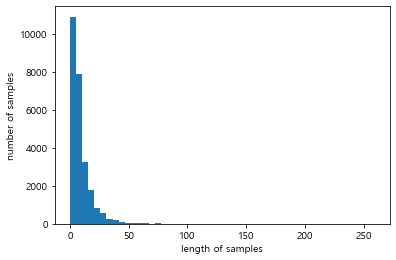

In [17]:
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [19]:
vocabs = list(model.wv.index_to_key)

word_vocab_list = [model.wv[v] for v in vocabs]

In [20]:
print(model.wv.most_similar("만족"))

[('만족하다', 0.9581924676895142), ('매우', 0.9360161423683167), ('만족스럽다', 0.9302577376365662), ('대체로', 0.9144056439399719), ('굿', 0.9036768078804016), ('만족도', 0.8942746520042419), ('모두', 0.8860676288604736), ('짱짱', 0.8846536874771118), ('품질', 0.8831947445869446), ('훌륭하다', 0.8785943984985352)]


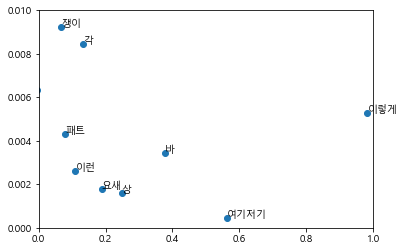

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vocab_list)
xs = xys[:,0]
ys = xys[:,1]
#plt.figure(figsize=(10 ,10))
plt.scatter(xs, ys, marker = 'o')
plt.xlim(0,1), plt.ylim(0,0.01)
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))